# Table of Contents

## 1. Importing Data
## 2. Post Wrangling Data Validation
## 3. Exploratory Data Analysis

### 3.1. Residential Analysis

#### 3.1.1. Average Residental Natural Gas Consumption by Month in the Last 10 Years
#### 3.1.2. Total Residential Natural Gas Consumption by Year in the Last 10 Years


### 3.2. Commercial Analysis

#### 3.1.1. Average Residental Natural Gas Consumption by Month in the Last 10 Years
#### 3.2.2. Total Residential Natural Gas Consumption by Year in the Last 10 Years

### 3.3. Comparision of Residential and Commercial Natural Gas Consumption Analysis

#### 3.3.1. Comparision of Average Natural Gas Consumption by Month in the Last 10 Years
#### 3.3.2. Comparision of Total Natural Gas Consumption by Year in the Last 10 Years

### 3.4. Total Consumption Analysis

#### 3.4.1. Average Natural Gas Consumption by Month in the Last 10 Years
#### 3.4.2. Total Natural Gas Consumption by Year in the Last 10 Years

## 4. Exporting Data







---
## 1. Importing Data


In [39]:
# import libraries

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [74]:
# define the path to the data directory

path = r'/Users/berkergoz/Desktop/US_Gas_Analysis'

In [ ]:
# load the data

df = pd.read_parquet(os.path.join(path, '02_Data', 'prepared_data', 'gas_data_cleaned.parquet'))

In [9]:
# check the first few rows of the dataframe

df.head()

,year,month,area,area-name,process,process-name,value,units
date,,,,,,,,
2014-01-01,2014,1,SFL,FLORIDA,VCS,Commercial Consumption,6605.0,MMCF
2014-01-01,2014,1,SNH,USA-NH,VCS,Commercial Consumption,1691.0,MMCF
2014-01-01,2014,1,SOR,USA-OR,VCS,Commercial Consumption,4711.0,MMCF
2014-01-01,2014,1,SDE,USA-DE,VCS,Commercial Consumption,2128.0,MMCF
2014-01-01,2014,1,SAZ,USA-AZ,VCS,Commercial Consumption,3915.0,MMCF


---
## 2. Post Wrangling Data Validation

### 2.1. Negative Values Control

In [20]:
# check if there are any negative values in the 'value' column

df[df['value'] < 0].value_counts()

Series([], Name: count, dtype: int64)

### 2.2. Time Range Control

In [31]:
# check the minimum value of date column

df.index.min() # the date column is index, so we can use df.index.min()

Timestamp('2014-01-01 00:00:00')

In [29]:
# check the minimum value of date column

df.index.max()

Timestamp('2024-01-01 00:00:00')

### 2.3. Outliers Control

In [32]:
# check the descriptive analysis of the dataframe

df.describe()

,year,month,value
count,12558.000000,12558.000000,1.255800e+04
mean,2018.535754,6.451744,1.304209e+04
std,2.898614,3.471981,5.707661e+04
min,2014.000000,1.000000,4.100000e+01
25%,2016.000000,3.000000,1.251250e+03
50%,2019.000000,6.000000,2.879000e+03
75%,2021.000000,9.000000,7.730250e+03
max,2024.000000,12.000000,1.037197e+06


In [36]:
# increase readability of the descriptive analysis

df["value"].describe().apply(lambda x: f"{x:,.0f}")


count       12,558
mean        13,042
std         57,077
min             41
25%          1,251
50%          2,879
75%          7,730
max      1,037,197
Name: value, dtype: object

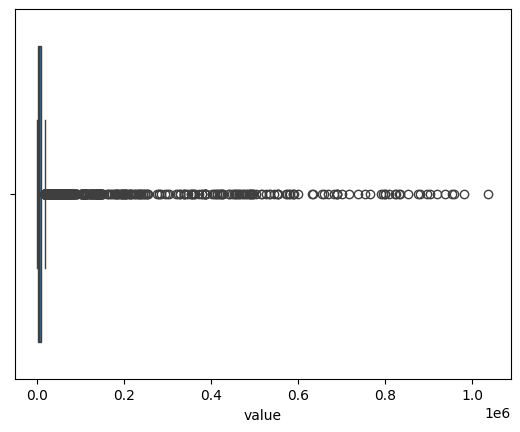

In [37]:
# viusalize outliers in the 'values' 

sns.boxplot(x=df['value'])
plt.show()

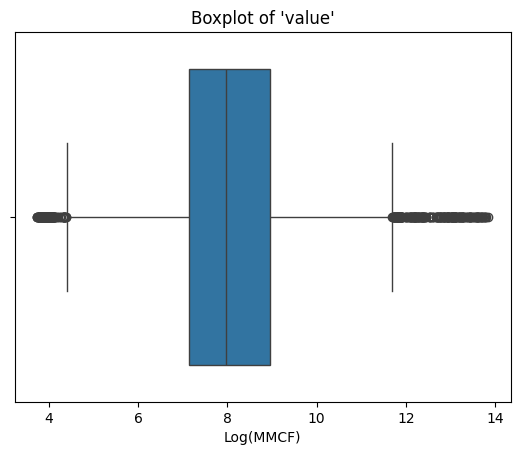

In [78]:
# visualize the distribution of the 'value' column in log scale to address outliers better

# Create a figure and axis for better control
fig, ax = plt.subplots()

# Plot the boxplot on the axis
sns.boxplot(x=np.log1p(df["value"]), ax=ax)

# Add title and label
ax.set_title("Boxplot of 'value'")
ax.set_xlabel("Log(MMCF)")

# Show the plot
plt.show()

In [79]:
# save the fig

fig.savefig(os.path.join(path, '04_Visualizations', 'boxplot_value.png'))

In [52]:
# checking the top 10 values in ascending order to understand the maximum values
df.sort_values("value", ascending=False).head(10)

,year,month,area,area-name,process,process-name,value,units
date,,,,,,,,
2014-01-01,2014,1,NUS,U.S.,VRS,Residential Consumption,1037197.0,MMCF
2018-01-01,2018,1,NUS,U.S.,VRS,Residential Consumption,981276.0,MMCF
2022-01-01,2022,1,NUS,U.S.,VRS,Residential Consumption,958107.0,MMCF
2019-01-01,2019,1,NUS,U.S.,VRS,Residential Consumption,953787.0,MMCF
2015-01-01,2015,1,NUS,U.S.,VRS,Residential Consumption,937954.0,MMCF
2024-01-01,2024,1,NUS,U.S.,VRS,Residential Consumption,918996.0,MMCF
2015-02-01,2015,2,NUS,U.S.,VRS,Residential Consumption,902364.0,MMCF
2021-01-01,2021,1,NUS,U.S.,VRS,Residential Consumption,895265.0,MMCF
2016-01-01,2016,1,NUS,U.S.,VRS,Residential Consumption,878936.0,MMCF


In [54]:
# checking the tail of the data to understand the minimum values

df.sort_values("value", ascending=True).head(10)


,year,month,area,area-name,process,process-name,value,units
date,,,,,,,,
2015-09-01,2015,9,SHI,USA-HI,VRS,Residential Consumption,41.0,MMCF
2014-08-01,2014,8,SME,USA-ME,VRS,Residential Consumption,41.0,MMCF
2014-07-01,2014,7,SME,USA-ME,VRS,Residential Consumption,41.0,MMCF
2017-08-01,2017,8,SHI,USA-HI,VRS,Residential Consumption,42.0,MMCF
2019-11-01,2019,11,SHI,USA-HI,VRS,Residential Consumption,42.0,MMCF
2015-08-01,2015,8,SHI,USA-HI,VRS,Residential Consumption,43.0,MMCF
2019-09-01,2019,9,SHI,USA-HI,VRS,Residential Consumption,43.0,MMCF
2014-10-01,2014,10,SHI,USA-HI,VRS,Residential Consumption,43.0,MMCF
2022-10-01,2022,10,SHI,USA-HI,VRS,Residential Consumption,43.0,MMCF


In [55]:
# checking the area names to understand the unique values in the 'area-name' column
df['area-name'].unique()

array(['FLORIDA', 'USA-NH', 'USA-OR', 'USA-DE', 'USA-AZ', 'USA-WV',
       'USA-HI', 'USA-NM', 'USA-MI', 'USA-MT', 'USA-MD', 'USA-MO',
       'WASHINGTON', 'USA-LA', 'USA-NE', 'USA-AR', 'USA-NJ', 'USA-ID',
       'USA-SC', 'USA-OK', 'USA-UT', 'USA-ND', 'MINNESOTA', 'USA-WY',
       'USA-VA', 'USA-NC', 'USA-MS', 'USA-IA', 'USA-IL', 'USA-TN',
       'CALIFORNIA', 'USA-VT', 'USA-NV', 'USA-GA', 'USA-AL', 'NEW YORK',
       'USA-SD', 'USA-CT', 'USA-WI', 'COLORADO', 'USA-KS',
       'MASSACHUSETTS', 'OHIO', 'USA-AK', 'USA-KY', 'USA-DC', 'U.S.',
       'USA-RI', 'USA-PA', 'USA-IN', 'TEXAS', 'USA-ME'], dtype=object)

In [57]:
# checking how many rows are there for the 'U.S.' area name

len(df[df['area-name'] == 'U.S.'])

242

In [58]:
# checking the descriptive statistics of the 'U.S.' area name

df[df['area-name'] == 'U.S.']['value'].describe().apply(lambda x: f"{x:,.0f}")

count          242
mean       338,882
std        235,831
min         99,781
25%        141,970
50%        239,660
75%        478,246
max      1,037,197
Name: value, dtype: object

Comment: It seems like the U.S. column has the highest valeus in the 'value' column, therefore the best approach would be to leave it out.

In [59]:
# dropping US 
df2 = df[df['area-name'] != 'U.S.']

In [72]:
# checking the shape of the new dataframe

df2.shape

(12316, 8)

In [60]:
# checking the top 5 valeus

df2.head()

,year,month,area,area-name,process,process-name,value,units
date,,,,,,,,
2014-01-01,2014,1,SFL,FLORIDA,VCS,Commercial Consumption,6605.0,MMCF
2014-01-01,2014,1,SNH,USA-NH,VCS,Commercial Consumption,1691.0,MMCF
2014-01-01,2014,1,SOR,USA-OR,VCS,Commercial Consumption,4711.0,MMCF
2014-01-01,2014,1,SDE,USA-DE,VCS,Commercial Consumption,2128.0,MMCF
2014-01-01,2014,1,SAZ,USA-AZ,VCS,Commercial Consumption,3915.0,MMCF


In [69]:
# checking the descriptive statistics

df2["value"].describe().apply(lambda x: f"{x:,.0f}")

count     12,316
mean       6,640
std       10,296
min           41
25%        1,232
50%        2,791
75%        7,261
max      101,155
Name: value, dtype: object

Observation: Maximum values are filtered out.

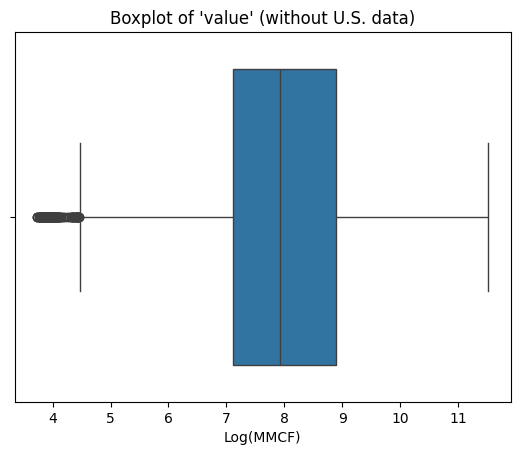

In [76]:
# Create a figure and axis for better control
fig, ax = plt.subplots()

# Plot the boxplot on the axis
sns.boxplot(x=np.log1p(df2["value"]), ax=ax)

# Add title and label
ax.set_title("Boxplot of 'value' (without U.S. data)")
ax.set_xlabel("Log(MMCF)")

# Show the plot
plt.show()

In [77]:
# save the graph to a file

fig.savefig(os.path.join(path, '04_Visualizations', 'boxplot_value_no_us.png'))

---
# 3. Exploratory Data Analysis

### 3.1. Residential Analysis


#### 3.1.1. Average Residental Natural Gas Consumption by Month in the Last 10 Years


#### 3.1.2. Total Residential Natural Gas Consumption by Year in the Last 10 Years

### 3.2. Commercial Analysis

#### 3.2.1. Average Residental Natural Gas Consumption by Month in the Last 10 Years

#### 3.2.2. Total Residential Natural Gas Consumption by Year in the Last 10 Years

### 3.3. Comparision of Residential and Commercial Natural Gas Consumption Analysis

#### 3.3.1. Comparision of Average Natural Gas Consumption by Month in the Last 10 Years

#### 3.3.2. Comparision of Total Natural Gas Consumption by Year in the Last 10 Years

### 3.4. Total Consumption Analysis

#### 3.4.1. Average Natural Gas Consumption by Month in the Last 10 Years

#### 3.4.2. Total Natural Gas Consumption by Year in the Last 10 Years

## 4. Exporting Data

In [80]:
# export the data

df2.to_parquet(os.path.join(path, '02_Data', 'prepared_data', 'gas_data_cleaned_no_us.parquet'))